In [141]:
#Importing lybraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap
import matplotlib.pyplot as plt

In [142]:
#Web scraping using BeautifulSoup
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

#global rating, Aircraft, Class, Travel_type, Route, Date, comfort, staff, food, entertainment, wifi, ground_service, vfm, recommend

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    df = pd.DataFrame()

#Looping through the html code
    for row in parsed_content.find_all("div", {"class": "body"}):
        data_dict = {'Comment': '', 
                     'Aircraft':'', 'Type Of Traveller':'', 'Seat Type':'', 'Route':'', 'Date Flown':'',
                     'Seat Comfort':0, 'Cabin Staff Service':0, 'Food & Beverages':0, 'Inflight Entertainment':0,
                     'Ground Service':0,'Wifi & Connectivity':0, 'Value For Money':0, 'Recommended':'', 'Rate':0}

        comment = {'Comment': row.find("div", {"class": "text_content"}).get_text()}
        rate = 0
        data_dict.update(comment)

        table = row.find_all('table')[0]

        for tr in  table.select('table.review-ratings tr'):            
            header=tr.find('td',class_='review-rating-header').text
            if tr.find('td',class_='review-value') :
                value=tr.find('td',class_='review-value').text
            else :
                value=len(tr.find('td',class_='review-rating-stars').select('.star.fill'))
                rate = rate + value
            data_dict.update({header:value})
        
        data_dict.update({"Rate":rate})
        df=df.append(data_dict,ignore_index=True)

    print(df)
        
 

Scraping page 1
          Aircraft  Cabin Staff Service  \
0       Boeing 777                  4.0   
1                                   5.0   
2             A350                  5.0   
3                                   2.0   
4                                   1.0   
..             ...                  ...   
95            A320                  5.0   
96                                  5.0   
97            A320                  5.0   
98                                  1.0   
99  Boeing 777-300                  4.0   

                                              Comment     Date Flown  \
0   Not Verified |  May 3, flew from Seattle to He...       May 2023   
1   ✅ Trip Verified | I went through three flights...     April 2023   
2   ✅ Trip Verified | An excellent flight in Club ...       May 2023   
3   ✅ Trip Verified | The flight schedule was dela...       May 2023   
4   ✅ Trip Verified | The worst experience in all ...      June 2023   
..                                 

          Aircraft  Cabin Staff Service  \
0         A321-neo                  5.0   
1                                   3.0   
2       Boeing 777                  3.0   
3                                   4.0   
4   Boeing 777-200                  3.0   
..             ...                  ...   
95            A330                  4.0   
96                                  0.0   
97            A230                  1.0   
98  Boeing 777-200                  5.0   
99  Boeing 777-200                  5.0   

                                              Comment     Date Flown  \
0   ✅ Trip Verified |  Absolutely shambolic custom...    August 2021   
1   ✅ Trip Verified |  Our flight back to Athens (...   October 2021   
2   ✅ Trip Verified |  Flight took off two hours l...  February 2022   
3   ✅ Trip Verified |  There was a mistake on my b...     March 2022   
4   ✅ Trip Verified | The economy cabin was surpri...     March 2022   
..                                                .

          Aircraft  Cabin Staff Service  \
0   Boeing 787-900                  5.0   
1                                   5.0   
2             A350                  5.0   
3                                   3.0   
4                                   5.0   
..             ...                  ...   
95            A320                  1.0   
96            A320                  1.0   
97            A320                  1.0   
98                                  1.0   
99                                  1.0   

                                              Comment      Date Flown  \
0   Not Verified | Flew from London Heathrow to Ab...    October 2019   
1   ✅ Trip Verified |  Johannesburg to Amsterdam v...  September 2019   
2   ✅ Trip Verified | Dubai to London Heathrow. I ...  September 2019   
3   ✅ Trip Verified | Istanbul to New York via Lon...    October 2019   
4   ✅ Trip Verified |  Yesterday my husband and I ...    October 2019   
..                                           

                 Aircraft  Cabin Staff Service  \
0                                          0.0   
1                                          4.0   
2              Boeing 777                  3.0   
3              Boeing 747                  5.0   
4                                          1.0   
..                    ...                  ...   
95             Boeing 777                  1.0   
96  A320 / Boeing 747-400                  5.0   
97                   A319                  1.0   
98                                         1.0   
99                                         3.0   

                                              Comment     Date Flown  \
0   ✅ Trip Verified |  We have been loyal customer...   October 2018   
1   ✅ Trip Verified |  Gatwick to Las Vegas. Board...  December 2018   
2   Not Verified |  Nassau to London. Premium Econ...  November 2018   
3   ✅ Trip Verified |  Phoenix to Accra via London...  November 2018   
4   ✅ Trip Verified |  Manchester to Lo

In [143]:
df.head()

,Aircraft,Cabin Staff Service,Comment,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Rate,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,,0.0,✅ Trip Verified | We have been loyal customer...,October 2018,0.0,0.0,0.0,1.0,no,Los Angeles to Rome via London,0.0,Economy Class,Family Leisure,1.0,0.0
1,,4.0,✅ Trip Verified | Gatwick to Las Vegas. Board...,December 2018,4.0,4.0,1.0,23.0,yes,Gatwick to Las Vegas,3.0,Economy Class,Family Leisure,4.0,3.0
2,Boeing 777,3.0,Not Verified | Nassau to London. Premium Econ...,November 2018,1.0,3.0,1.0,11.0,no,Nassau to London,2.0,Premium Economy,Couple Leisure,1.0,0.0
3,Boeing 747,5.0,✅ Trip Verified | Phoenix to Accra via London...,November 2018,5.0,5.0,3.0,28.0,yes,Phoenix to Accra via London,5.0,Business Class,Business,5.0,0.0
4,,1.0,✅ Trip Verified | Manchester to London. The b...,November 2018,0.0,1.0,0.0,7.0,no,Manchester to London,3.0,Economy Class,Solo Leisure,2.0,0.0


In [145]:
df.to_csv('data/BA_reviews.csv')

In [146]:
df.describe()

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Rate,Seat Comfort,Value For Money,Wifi & Connectivity
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.160000,2.210000,2.790000,1.310000,15.100000,2.780000,2.630000,0.220000
std,1.661933,1.719144,1.519536,1.488644,7.243946,1.425454,1.397364,0.690191
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,1.750000,1.000000,0.000000
50%,3.000000,2.000000,3.000000,1.000000,14.000000,3.000000,3.000000,0.000000
75%,5.000000,4.000000,4.000000,3.000000,21.000000,4.000000,4.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,29.000000,5.000000,5.000000,5.000000


In [147]:
df.dtypes

Aircraft                   object
Cabin Staff Service       float64
Comment                    object
Date Flown                 object
Food & Beverages          float64
Ground Service            float64
Inflight Entertainment    float64
Rate                      float64
Recommended                object
Route                      object
Seat Comfort              float64
Seat Type                  object
Type Of Traveller          object
Value For Money           float64
Wifi & Connectivity       float64
dtype: object

In [148]:
X = df["Food & Beverages"].values.reshape(-1, 1)
y = df["Inflight Entertainment"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (100, 1) (100, 1)


Text(0, 0.5, 'Inflight Entertainment')

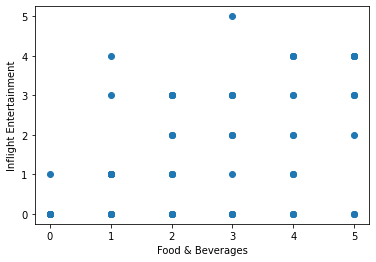

In [149]:
plt.scatter(X, y)
plt.xlabel("Food & Beverages")
plt.ylabel("Inflight Entertainment")

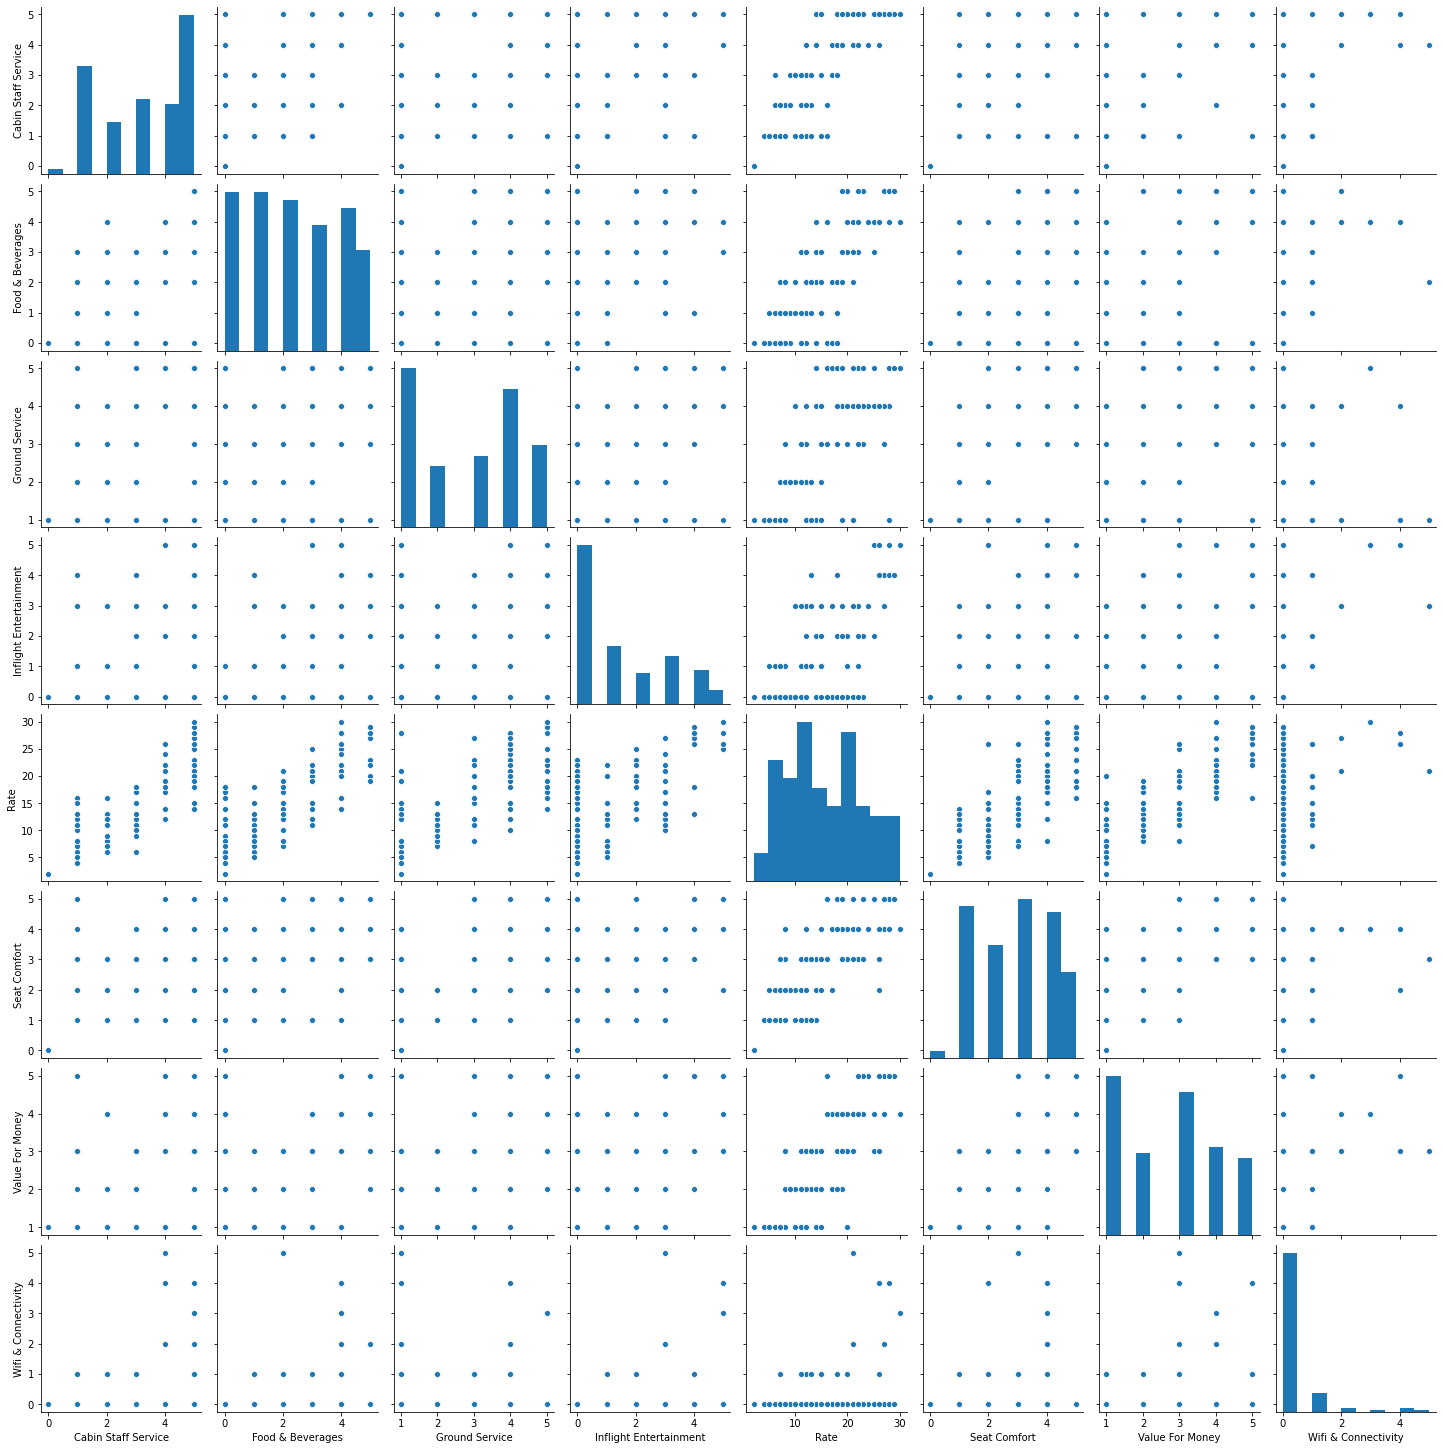

In [59]:
#Looking for any correlation
pairplot(df);

In [150]:
df1 = df
df1

,Aircraft,Cabin Staff Service,Comment,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Rate,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,,0.0,✅ Trip Verified | We have been loyal customer...,October 2018,0.0,0.0,0.0,1.0,no,Los Angeles to Rome via London,0.0,Economy Class,Family Leisure,1.0,0.0
1,,4.0,✅ Trip Verified | Gatwick to Las Vegas. Board...,December 2018,4.0,4.0,1.0,23.0,yes,Gatwick to Las Vegas,3.0,Economy Class,Family Leisure,4.0,3.0
2,Boeing 777,3.0,Not Verified | Nassau to London. Premium Econ...,November 2018,1.0,3.0,1.0,11.0,no,Nassau to London,2.0,Premium Economy,Couple Leisure,1.0,0.0
3,Boeing 747,5.0,✅ Trip Verified | Phoenix to Accra via London...,November 2018,5.0,5.0,3.0,28.0,yes,Phoenix to Accra via London,5.0,Business Class,Business,5.0,0.0
4,,1.0,✅ Trip Verified | Manchester to London. The b...,November 2018,0.0,1.0,0.0,7.0,no,Manchester to London,3.0,Economy Class,Solo Leisure,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Boeing 777,1.0,✅ Trip Verified | Aberdeen to Abu Dhabi via L...,July 2018,1.0,1.0,4.0,13.0,no,Aberdeen to Abu Dhabi via London,3.0,Economy Class,Family Leisure,3.0,0.0
96,A320 / Boeing 747-400,5.0,✅ Trip Verified | Prague to Denver via London...,June 2018,5.0,1.0,3.0,19.0,no,Prague to Denver via London,3.0,Economy Class,Solo Leisure,2.0,0.0
97,A319,1.0,✅ Trip Verified | Seville to Gatwick. If it w...,July 2018,1.0,1.0,0.0,8.0,no,Seville to Gatwick,2.0,Economy Class,Couple Leisure,3.0,0.0
98,,1.0,✅ Trip Verified | London to Amsterdam. A dela...,July 2018,0.0,1.0,0.0,4.0,no,London to Amsterdam,1.0,Economy Class,Solo Leisure,1.0,0.0


In [151]:
df2 = df1[['Cabin Staff Service','Food & Beverages', 'Ground Service','Inflight Entertainment','Rate', 'Seat Comfort', 'Value For Money', 'Wifi & Connectivity' ,'Recommended']]
df2.head()

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Rate,Seat Comfort,Value For Money,Wifi & Connectivity,Recommended
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,no
1,4.0,4.0,4.0,1.0,23.0,3.0,4.0,3.0,yes
2,3.0,1.0,3.0,1.0,11.0,2.0,1.0,0.0,no
3,5.0,5.0,5.0,3.0,28.0,5.0,5.0,0.0,yes
4,1.0,0.0,1.0,0.0,7.0,3.0,2.0,0.0,no


In [152]:
# Split our data into X and y
X = df2.iloc[:, :-1] # every column except the last one
y = df2['Recommended']

In [153]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

In [156]:
#Our training data frame
X_train

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Rate,Seat Comfort,Value For Money,Wifi & Connectivity
15,4.0,0.0,1.0,0.0,12.0,4.0,3.0,0.0
40,1.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0
96,5.0,5.0,1.0,3.0,19.0,3.0,2.0,0.0
9,5.0,4.0,5.0,2.0,25.0,5.0,4.0,0.0
72,3.0,2.0,2.0,1.0,13.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...
60,3.0,1.0,2.0,0.0,10.0,2.0,2.0,0.0
71,4.0,0.0,5.0,0.0,18.0,5.0,4.0,0.0
14,5.0,2.0,1.0,0.0,14.0,3.0,3.0,0.0
92,4.0,3.0,5.0,0.0,19.0,4.0,3.0,0.0


In [157]:
#Our testing data frame
X_test

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Rate,Seat Comfort,Value For Money,Wifi & Connectivity
83,5.0,3.0,5.0,0.0,21.0,4.0,4.0,0.0
53,5.0,5.0,3.0,4.0,27.0,5.0,5.0,0.0
70,5.0,3.0,4.0,5.0,25.0,5.0,3.0,0.0
45,1.0,0.0,1.0,0.0,4.0,1.0,1.0,0.0
44,5.0,5.0,4.0,4.0,28.0,5.0,5.0,0.0
39,5.0,3.0,1.0,2.0,14.0,1.0,2.0,0.0
22,3.0,2.0,3.0,1.0,15.0,3.0,2.0,1.0
80,5.0,2.0,4.0,0.0,19.0,5.0,3.0,0.0
10,1.0,1.0,3.0,0.0,11.0,3.0,3.0,0.0
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [158]:
from sklearn import tree

recomendation = tree.DecisionTreeClassifier(max_depth=2)
recomendation.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [159]:
from sklearn import metrics

# We use the model to predict the test_encoded data
test_pred_class = recomendation.predict(X_train)
print(metrics.accuracy_score(y_train, test_pred_class))


0.9333333333333333


In [160]:
# We use the model to predict the test_encoded data
test_pred_class = recomendation.predict(X_test)
print(metrics.accuracy_score(y_test, test_pred_class))

0.88


In [161]:
test_pred_class

array(['yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no'], dtype=object)

In [162]:
y_test

83     no
53    yes
70    yes
45     no
44    yes
39     no
22     no
80    yes
10     no
0      no
18     no
30     no
73    yes
33     no
90    yes
4      no
76     no
77     no
12     no
31    yes
55     no
88     no
26    yes
42     no
69     no
Name: Recommended, dtype: object

In [163]:
#Printing confiusion metrix
conf_matrix = metrics.confusion_matrix(y_test, test_pred_class, labels=['yes', 'no'])
conf_matrix

array([[ 7,  1],
       [ 2, 15]], dtype=int64)